## Avato

# [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction/overview)

_**Machine Learning combined with sensitivity analysis to develop and optimize marketing business strategies**_

---

---

## Project Overview
---
In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding. Machine learning is routinely used to help make business decisions yet most often, ML is only used to make predictions while business decisions require some judgement and intuition from experts.


## Data
---
For this competition, Avazu have provided 11 days worth of data to build and test prediction models. The train data covers 10 days of click streams data from 2014–10–21 to 2014–10–30, that is 240 hours and 1 day of ads for testing model predictions.

### Files
- train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
- test - Test set. 1 day of ads to for testing your model predictions. 
- sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.

### Characteristics

- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21


__Target feature__: click

__Site features__: site_id, site_domain, site_category

__App features__: app_id, app_domain, app_category

__Device feature__: device_id, device_ip, device_model, device_type, device_conn_type

__Anonymized categorical features__: C14-C21



## Evaluation
---
Click-through rate is a number, but we need to determine if the user is going to click or not so we will be predicting using classification models. Our evaluation metric will be logarithmic loss to determine how accurate the final model is. Log loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of the machine learning model is to minimize this value (error). Log loss takes into account the uncertainty of the prediction based on how much it varies from the actual label as it penalizes both types of errors especially those that are confident and wrong.

#### Calculating log loss from scratch
    def logloss(true_label, predicted, eps=1e-15):
      p = np.clip(predicted, eps, 1 - eps)
      if true_label == 1:
        return -log(p)
      else:
        return -log(1 - p)
        
#### Sklearn
    from sklearn.metrics import log_loss
    log_loss(y_true, y_pred, eps=1e-15)

#### Keras (Deep Learning)
    model.compile(loss='categorical_cross_entropy', optimizer='sgd')

## Modeling
---

### Benchmark Model
TODO

### Best Model
TODO


## Application
---
Apply machine learning models and analysis to design business strategy.


## Overall Methodology
----------
I like to add this framework here so I can always go back to it and check if I need to work on a certain step or want to add more to it. I don't necessarily need to do every step.


1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use         
2. Collecting relevant information and data
    - What type of data do we have?
    - Can we use any complimentary data with that is public that will help our with our analysis/modeling?
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know if our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away?
    - Can the data be plotted?
    - What changes do we need in order to make the data usable if it's not already?
    - This step is not really an isolated step as it can encompass exploratory, feature engineering + more
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Model development & scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Normalizing the data to be on similar scales
        - Normalization, standardization methods (Z-score, minmax, median)
    - Create baseline, pre-tuned, and tuned models (includes cross-validation)
        - Create easy to more complex models if needed (think about computational cost, complexity, explainability)
    - Hyperparameter tuning
    - Fit cross-validated tuned models using best hyperparameters
    - Score model and get results
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Which features are important?
    - Iterate steps if we are proceeding with specific features selected
        - Dimensionality reduction methods (PCA, LDA) to see if we can reduce model complexity (this step can be before modeling as well)
    - Is the final model good enough in terms of these questions:
        - Accuracy: How many does it get right?
        - Speed: How fast does it take for the model to deploy?
        - Scalability: Can the model handle large datasets?
        - Robustness: How well does the model handle outliers/missing values?
        - Interpretability: Is the model easy to understand?
9. Results
    - What's our conclusion?
    - What actions are we going to take?
10. Ending notes
    - Extra information that we may not go over like steps that we did not go into or missed
        - Any other possible methods/solutions that we could look at in the future

---
---

### Import libraries
---

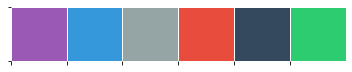

In [1]:
# Toolbox 101
from datetime import datetime, timedelta, date
from tqdm import tqdm
import pickle
import gc
import os
import gzip
import pandas as pd
import pandas_profiling
import numpy as np
import random as rand
import datetime as dt
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import plotly.plotly as py
import plotly.graph_objs as go # graph_objects in version 4 (currently have plotly v3 installed)
import plotly.offline as pyoff
import plotly.figure_factory as ff

# Stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import power

# Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance, plot_tree
import lightgbm as lgb

# Evaluation
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

# Set palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
# 34495e

seed = 100

### Helpers
---

In [2]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()
    
# Define a null function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

# Define plot_nulls function
def plot_nulls(train):
    # Get null pct and counts
    null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)/len(train),2)*100, columns=['Null Data %'])

    # Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data %']>0]

    # Create figure space
    if len(all_nulls) > 8:
        plt.figure(figsize=(12, 8))
    elif len(all_nulls) > 5:
        plt.figure(figsize=(6, 8))
    else:
        plt.figure(figsize=(4, 8))

    # Create plot
    sns.barplot(x=all_nulls.index,
                y='Null Data %',
                data=all_nulls)

    # Set plot features
    plt.ylim(0, 100)
    plt.xticks(rotation='90')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values', fontsize=15)
    plt.title('Percent of Missing Data by Features', fontsize=15)
    plt.show()
    
# Create a new function to capture feature importance for models
def feature_importance(model):
    
    importance = pd.DataFrame({'Feature': headers,
                               'Importance': np.round(model.feature_importances_,3)})
    
    importance = importance.sort_values(by = 'Importance', ascending = False).set_index('Feature')
    
    return importance

# Reduce data size
def reduce_mem_usage(df):
    ''' 
    Iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
    '''
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    # Loop through every column in the dataframe
    for col in df.columns:
        col_type = df[col].dtype
        
        # Objects
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            # Numbers
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Load data
---

In [3]:
os.listdir('LargeData')

['18-online-retail.csv',
 '19-credit-card-defaults.csv',
 '28-test.csv',
 '28-train.csv',
 '29-data.csv',
 '37-ctr-train.gz']

### Sample data
Take a fraction of the data to explore versus the entire dataset for speed purposes.

Method 1: Load the data to the specified amount of rows

Method 2: Load the data and then take a fraction of the dataset.

In [4]:
# Set number to sample
n = 40428967
sample_size = 500000
skip_values = sorted(rand.sample(range(1, n), n-sample_size))

print('Total Entries:', n)
print('Sample Size:', sample_size)

Total Entries: 40428967
Sample Size: 500000


In [5]:
# Parse date
parse_date = lambda x: pd.datetime.strptime(x, '%y%m%d%H')

In [6]:
# Set data types
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}

In [7]:
# Load dataset (Method 1)
with gzip.open('LargeData/37-ctr-train.gz') as f:
    train = pd.read_csv(f, parse_dates=['hour'], date_parser=parse_date, dtype=types_train, skiprows=skip_values)

In [8]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1275849718,0,2014-10-21,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,-1,33
1,586388666,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
2,762526870,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,100050,117
3,-1928484824,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,-1,79
4,-1368186722,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79


In [9]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')

Train dataset has 500000 rows and 24 columns.


In [10]:
train.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,3.852425e+06,0.169438,1004.970958,0.289144,1.017072,0.331382,18840.588318,318.896648,60.188640,2112.421310,1.434198,227.039438,53335.411704,83.241698
std,1.238994e+09,0.375139,1.097171,0.509741,0.531226,0.854523,4967.234784,21.374683,47.682536,610.143239,1.325823,351.057948,49949.201708,70.257315
min,-2.147471e+09,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,-1.067373e+09,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,3.649651e+06,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000
75%,1.077748e+09,0.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,101.000000
max,2.147477e+09,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
id                  500000 non-null int32
click               500000 non-null int32
hour                500000 non-null datetime64[ns]
C1                  500000 non-null int32
banner_pos          500000 non-null int32
site_id             500000 non-null object
site_domain         500000 non-null object
site_category       500000 non-null object
app_id              500000 non-null object
app_domain          500000 non-null object
app_category        500000 non-null object
device_id           500000 non-null object
device_ip           500000 non-null object
device_model        500000 non-null object
device_type         500000 non-null int32
device_conn_type    500000 non-null int32
C14                 500000 non-null int32
C15                 500000 non-null int32
C16                 500000 non-null int32
C17                 500000 non-null int32
C18                 500000 non-

### Target

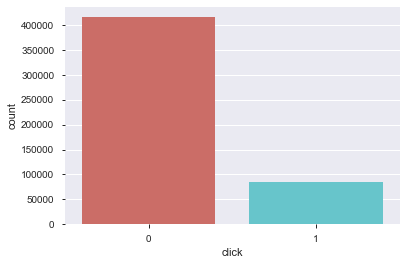

In [12]:
sns.countplot(x='click',
              data=train,
              palette='hls'
            )
plt.show()

Frequency of click :


,Count,Percentage
0,415281,83.06
1,84719,16.94


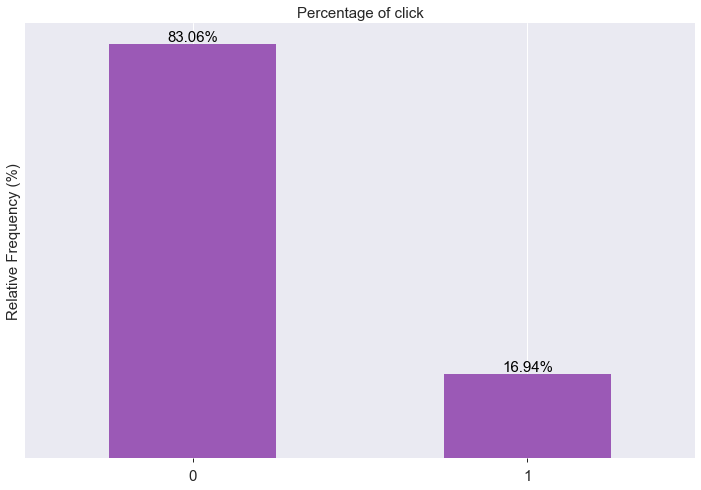

In [13]:
freq_table(train.click) # train.click.value_counts(normalize=True)

### What are popular click hours?

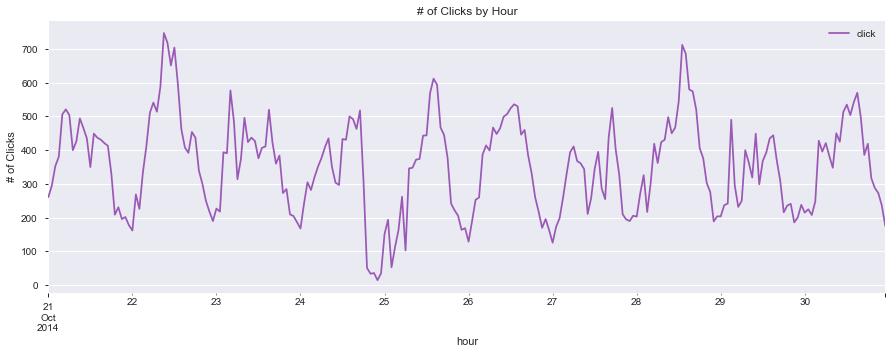

In [14]:
# Group by
train.groupby('hour').agg({'click': 'sum'}).plot(figsize=(15, 5))

# Set plot features
plt.ylabel('# of Clicks')
plt.title('# of Clicks by Hour')
plt.show()

There looks to be a cyclical pattern with peaks and lows during certain hours. From the plot above, the peaks seem to be in the middle of each hour indicating 12PM and with extreme lows around midnight.
- Users are most active around noon
- Users are not active around midnight
    - Are there any Ads being shown during this time?
- If Ads are evenly shown throughout the day, reduce costs by showing them more often during 9AM to 9PM (guessing the timeframe).

### Hour feature

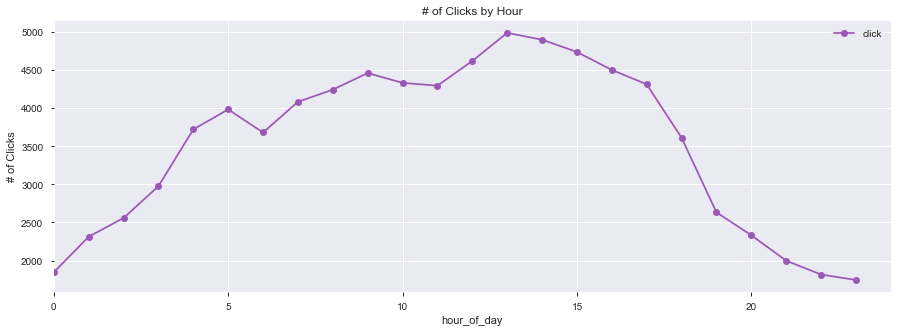

In [15]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click': 'sum'}).plot(figsize=(15, 5), marker='o') # linestyle='--', color='r'

# Set plot features
plt.xlim(0, 24)
plt.ylabel('# of Clicks')
plt.title('# of Clicks by Hour')
# plt.tight_layout()
plt.show()

My initial observations earlier looks to be just about right.The highest number of clicks is at hour 13 and 14 (1PM and 2PM), and the lowest number of clicks is at hour 0 (midnight). This can be a useful feature for rough estimation.

Instead of 9AM through 9PM, change the Ads to show more often between 4AM through 7PM.

### Impressions

In [16]:
train.groupby(['hour_of_day', 'click']).size().unstack()

click,0,1
hour_of_day,,
0,8665,1846
1,9826,2313
2,12532,2559
3,14654,2977
4,19791,3723
5,20261,3985
6,17960,3682
7,18908,4085
8,21883,4245


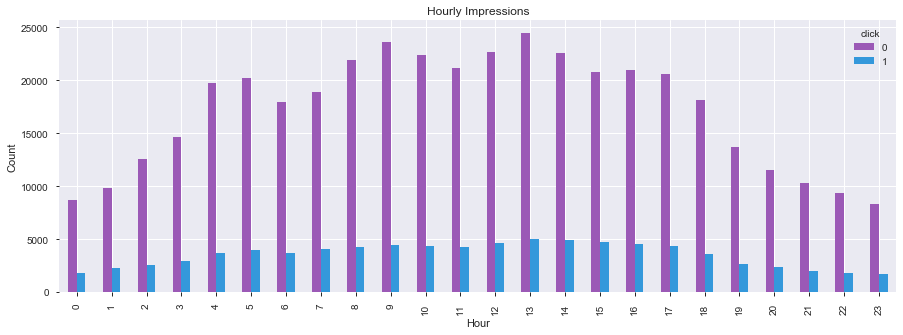

In [17]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', figsize=(15,5))

# Set plot features
plt.title('Hourly Impressions')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

### Click through rate

In [18]:
# Get click data
ctr_df = train[train['click']==1]

# Create new df to store clicks
hour_df = train[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()
hour_df = hour_df.rename(columns={'click': 'Impressions'})
hour_df['clicks'] = ctr_df[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()['click']

# Calculate CTR 
hour_df['CTR'] = (hour_df['clicks'] / hour_df['Impressions']) * 100

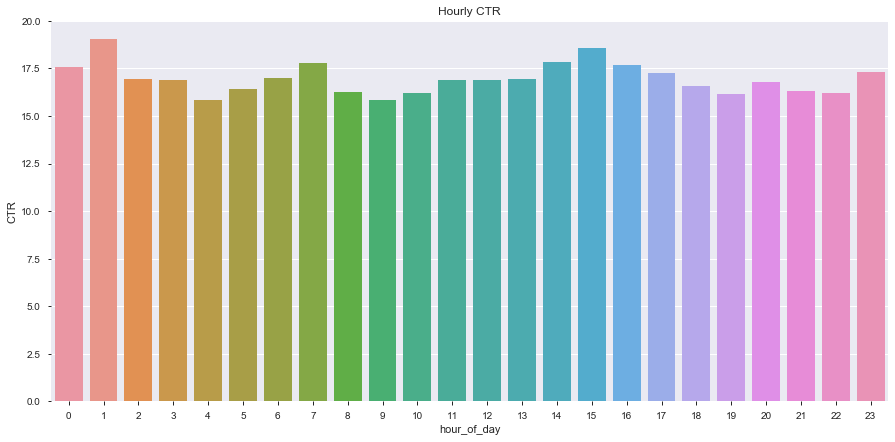

In [19]:
# Set figure size
plt.figure(figsize=(15,7))

# Barplot
sns.barplot(y='CTR',
            x='hour_of_day',
            data=hour_df)

# Set plot features
plt.title('Hourly CTR')
plt.show()

Although it's indicated that clicks were lowest around midnight and highest around noon, an interesting observation here is that the high CTR (> 17%) happened at hours 0, 1, 2, 7, 14, 15, and 16. We should make an effort to figure out why there are discrepancies between the clicks and impressions.

We want to figure out the what are user affinities per hour to better segment and optimize marketing resources.
- Are higher valued users around those higher CTR times? 
- Are we showing Ads inefficiently?
- What's ROI of the current marketing initiative?

### Clicks by Day

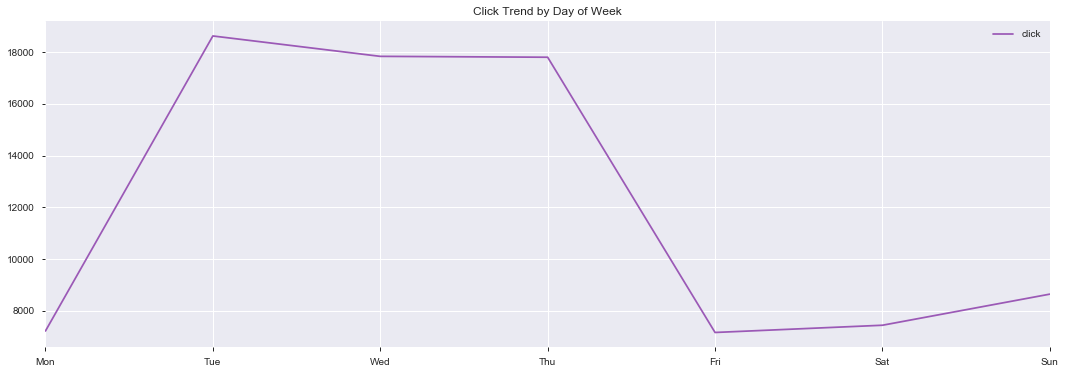

In [20]:
# Get day of week feature
train['day_of_week'] = train['hour'].apply(lambda x: x.weekday_name)

# Names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group
train.groupby('day_of_week').agg({'click': 'sum'}).reindex(day_names).plot(figsize=(18,6))

# Set plot features
ticks = list(range(0, 7 ,1))
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)
plt.xlabel('')
plt.title('Click Trend by Day of Week')
plt.show()


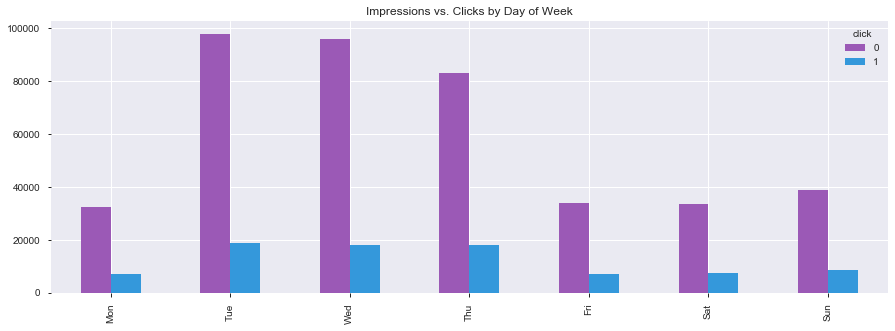

In [21]:
train.groupby(['day_of_week','click']).size().unstack().reindex(day_names).plot(kind='bar', figsize=(15,5))

# Set plot features
ticks = list(range(0, 7 ,1))
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)
plt.xlabel('')
plt.title('Impressions vs. Clicks by Day of Week')
plt.show()

Tuesday and Wednesdays have the most number of impressions and clicks. I am surprised that the weekend and Monday is so low. The types of advertisements attract users during the working days not including the days that are around the weekend so this can be an indicator on the type of advertisements shown and when it's shown. Let's check CTR.

In [22]:
# Get click data by day
ctr_df = train[train['click']==1]

# Create new df to store clicks
day_df = train[['day_of_week', 'click']].groupby(['day_of_week']).count().reset_index()
day_df = day_df.rename(columns={'click': 'Impressions'})
day_df['clicks'] = ctr_df[['day_of_week', 'click']].groupby(['day_of_week']).count().reset_index()['click']

# Calculate CTR 
day_df['CTR'] = (day_df['clicks'] / day_df['Impressions']) * 100

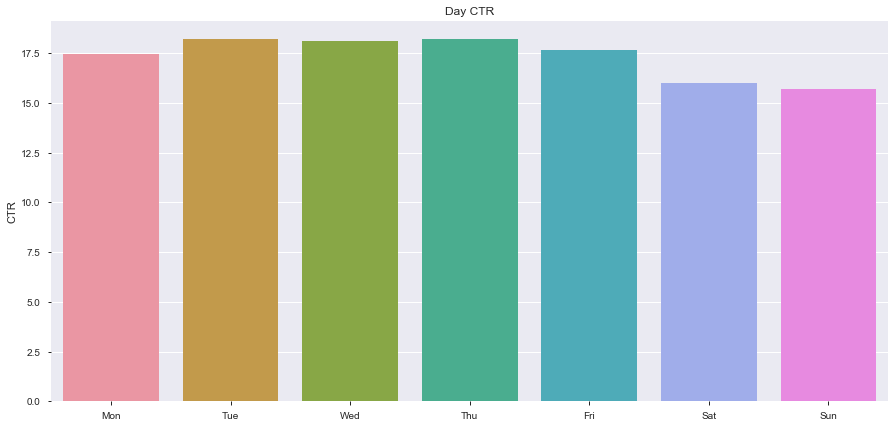

In [23]:
# Set figure size
plt.figure(figsize=(15,7))

# Barplot
sns.barplot(y='CTR',
            x='day_of_week',
            data=day_df)

# Set plot features
ticks = list(range(0, 7 ,1))
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)
plt.xlabel('')
plt.title('Day CTR')
plt.show()

Although the numbers are a lot higher from Tuesday through Thursday, CTR is roughly similar from Monday through Friday with a drop during the weekend since real-time bidding does not occur occur as much for this company. Types of advertisements should vary on what's being advertised so we are able to capture relevant consumers inside the population. My assumption is that if the ads are more business related then the work week may be better than the weekend versus ads on clothing sales during the weekend.

### C1

In [24]:
train.C1.value_counts(normalize=True)

1005    0.918714
1002    0.054488
1010    0.022742
1012    0.002798
1007    0.000898
1001    0.000250
1008    0.000110
Name: C1, dtype: float64

In [25]:
train.C1.value_counts()

1005    459357
1002     27244
1010     11371
1012      1399
1007       449
1001       125
1008        55
Name: C1, dtype: int64

C1 is an anonymized feature so we don't know what it is. Majority of the values are 1005 with only 2 more that are above 1% in this dataset. We can bin or group the values together that are below 1% as an engineering technique, but we should explore the data more.

In [26]:
train.groupby('C1').mean()['click'].sort_values(ascending=False)

C1
1002    0.216194
1012    0.182273
1005    0.168642
1010    0.095858
1008    0.054545
1007    0.026726
1001    0.016000
Name: click, dtype: float64

1002 and 1005 seem to have two of the highest click percentage with 1008 trailing not too far behind but this dataset only has 65 values.

In [27]:
# C1 data
c1_df = train[['C1', 'click']].groupby('C1').count().reset_index()
c1_df = c1_df.rename(columns={'click': 'Impressions'})
c1_df['clicks'] = ctr_df[['C1', 'click']].groupby('C1').count().reset_index()['click']

# Calculate CTR
c1_df['CTR'] = c1_df['clicks'] / c1_df['Impressions'] * 100

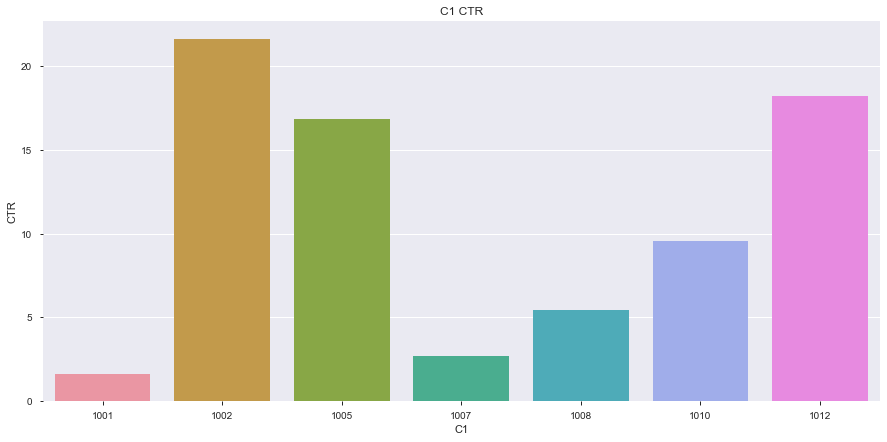

In [28]:
# Set figure size
plt.figure(figsize=(15,7))

# Barplot
sns.barplot(y='CTR',
            x='C1',
            data=c1_df)

# Set plot features
plt.title('C1 CTR')
plt.show()

In [29]:
c1_df.mean()

C1              1006.428571
Impressions    71428.571429
clicks         12102.714286
CTR               10.860558
dtype: float64

In [30]:
c1_df.CTR.describe()

count     7.000000
mean     10.860558
std       8.059332
min       1.600000
25%       4.063576
50%       9.585788
75%      17.545765
max      21.619439
Name: CTR, dtype: float64

### Banner Position

In [31]:
train.banner_pos.value_counts(normalize=True)

0    0.719270
1    0.278892
7    0.001164
2    0.000326
4    0.000188
5    0.000110
3    0.000050
Name: banner_pos, dtype: float64

In [32]:
train.banner_pos.value_counts()

0    359635
1    139446
7       582
2       163
4        94
5        55
3        25
Name: banner_pos, dtype: int64

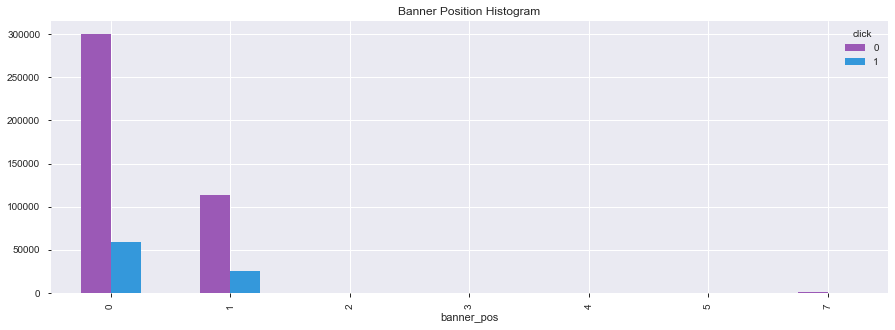

In [33]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(15,5))
                                                             
# Set plot features
plt.title('Banner Position Histogram')
plt.show()

In [34]:
# Banner data
banner_df = train[['banner_pos', 'click']].groupby('banner_pos').count().reset_index()
banner_df = banner_df.rename(columns={'click': 'Impressions'})
banner_df['clicks'] = ctr_df[['banner_pos', 'click']].groupby('banner_pos').count().reset_index()['click']

# Calculate CTR
banner_df['CTR'] = banner_df['clicks'] / banner_df['Impressions'] * 100

In [35]:
sort_banners = banner_df.sort_values(by='CTR', ascending=False)['banner_pos'].tolist()
sort_banners

[7, 3, 4, 1, 0, 2, 5]

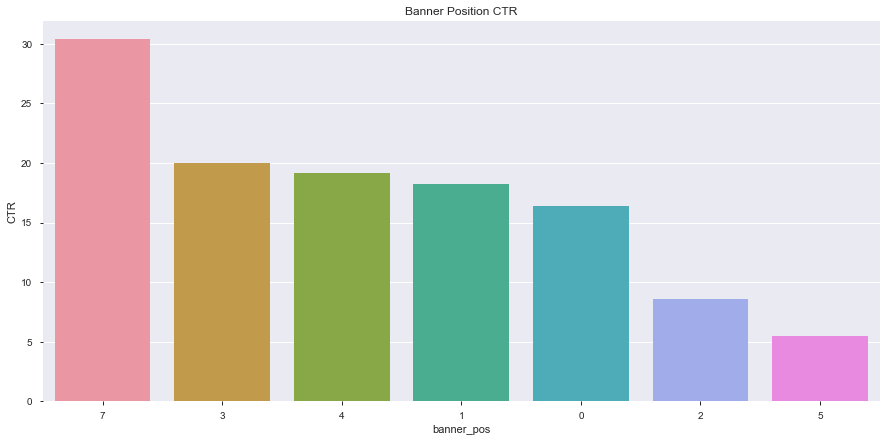

In [36]:
# Set figure size
plt.figure(figsize=(15,7))

# Barplot
sns.barplot(y='CTR',
            x='banner_pos',
            data=banner_df,
            order=sort_banners
           )

# Set plot features
plt.title('Banner Position CTR')
plt.show()

In [37]:
banner_df.CTR.describe()

count     7.000000
mean     16.897453
std       8.158962
min       5.454545
25%      12.502384
50%      18.261549
75%      19.574468
max      30.412371
Name: CTR, dtype: float64

### Site ID

In [38]:
train.site_id.value_counts(normalize=True).head(10)

85f751fd    0.361230
1fbe01fe    0.160512
e151e245    0.065386
d9750ee7    0.023590
5b08c53b    0.022506
5b4d2eda    0.019156
856e6d3f    0.018842
a7853007    0.011572
b7e9786d    0.008962
6399eda6    0.008536
Name: site_id, dtype: float64

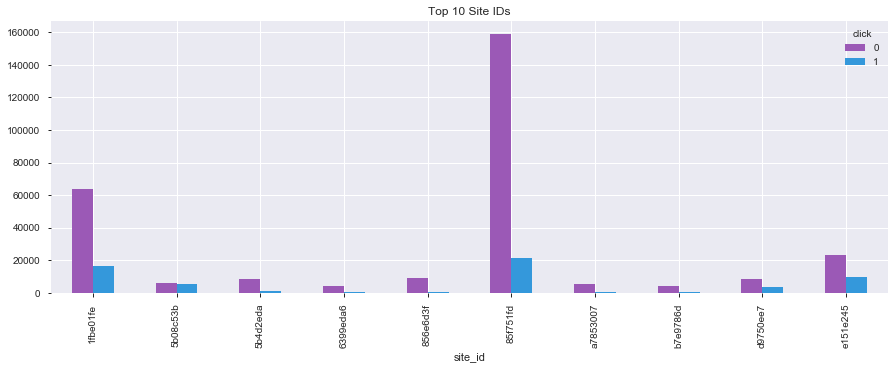

In [39]:
# Top 10
top_10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top_10_sites_click = top_10_sites[top_10_sites['click']==1]
top_10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar',
                                                                 figsize=(15,5),
                                                                 title='Top 10 Site IDs')
plt.show()

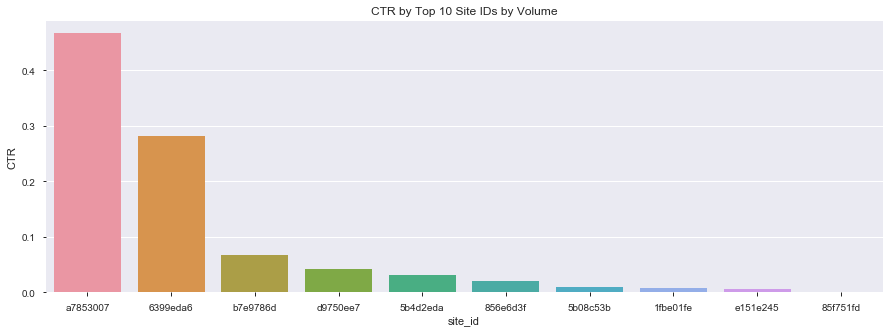

In [40]:
# Site data
site_df = top_10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
site_df = site_df.rename(columns={'click': 'impressions'})
site_df['clicks'] = ctr_df[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
site_df['CTR'] = site_df['clicks'] / site_df['impressions'] * 100

# Sort
sort_site = site_df.sort_values(by='CTR',ascending=False)['site_id'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='site_id', data=site_df, order=sort_site)
plt.title('CTR by Top 10 Site IDs by Volume')
plt.show()

### Site Domain

In [41]:
train.site_domain.value_counts(normalize=True).head(10)

c4e18dd6    0.374224
f3845767    0.160512
7e091613    0.082488
7687a86e    0.031916
98572c79    0.024392
16a36ef3    0.021098
58a89a43    0.018842
9d54950b    0.009366
b12b9f85    0.009104
17d996e6    0.008626
Name: site_domain, dtype: float64

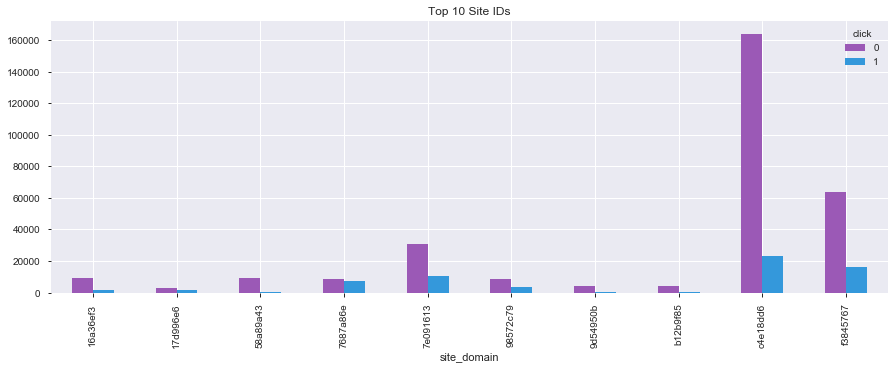

In [42]:
# Top 10
top_10_domains = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top_10_domains_click = top_10_domains[top_10_domains['click']==1]
top_10_domains.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar',
                                                                 figsize=(15,5),
                                                                 title='Top 10 Site IDs')
plt.show()

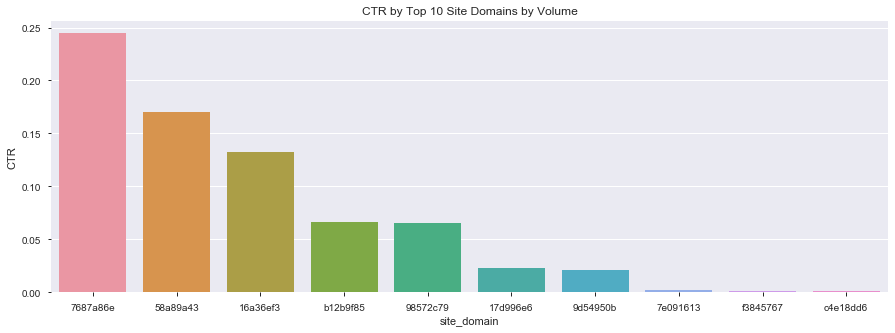

In [43]:
# Site data
domain_df = top_10_domains[['site_domain','click']].groupby(['site_domain']).count().reset_index()
domain_df = domain_df.rename(columns={'click': 'Impressions'})
domain_df['clicks'] = ctr_df[['site_domain', 'click']].groupby(['site_domain']).count().reset_index()['click']
domain_df['CTR'] = domain_df['clicks'] / domain_df['Impressions'] * 100

# Sort
sort_domain = domain_df.sort_values(by='CTR',ascending=False)['site_domain'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='site_domain', data=domain_df, order=sort_domain)
plt.title('CTR by Top 10 Site Domains by Volume')
plt.show()

### Site Category

In [44]:
train.site_category.value_counts(normalize=True)

50e219e0    0.408818
f028772b    0.313288
28905ebd    0.182496
3e814130    0.075402
f66779e6    0.006192
75fa27f6    0.004046
335d28a8    0.003420
76b2941d    0.002700
c0dd3be3    0.001032
72722551    0.000682
dedf689d    0.000602
70fb0e29    0.000570
0569f928    0.000392
8fd0aea4    0.000172
a818d37a    0.000062
42a36e14    0.000048
bcf865d9    0.000026
9ccfa2ea    0.000020
e787de0e    0.000020
5378d028    0.000010
c706e647    0.000002
Name: site_category, dtype: float64

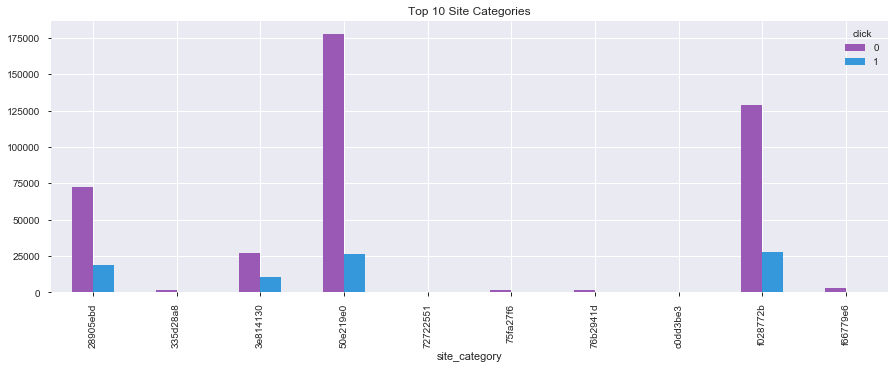

In [45]:
# Top 10
top_10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top_10_category_click = top_10_category[top_10_category['click']==1]
top_10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar',
                                                                          figsize=(15,5),
                                                                          title='Top 10 Site Categories')
plt.show()

In [46]:
top_10_cat = top_10_category.groupby(['site_category', 'click']).size().unstack().reset_index()
top_10_cat = top_10_cat.rename(columns={0: 'Impressions', 1: 'Clicks'})
top_10_cat['CTR'] = top_10_cat['Clicks'] / (top_10_cat['Clicks'] + top_10_cat['Impressions'])
top_10_cat

click,site_category,Impressions,Clicks,CTR
0,28905ebd,72405,18843,0.206503
1,335d28a8,1530,180,0.105263
2,3e814130,27076,10625,0.281823
3,50e219e0,177994,26415,0.129226
4,72722551,319,22,0.064516
5,75fa27f6,1807,216,0.106772
6,76b2941d,1320,30,0.022222
7,c0dd3be3,468,48,0.093023
8,f028772b,128654,27990,0.178685
9,f66779e6,2979,117,0.037791


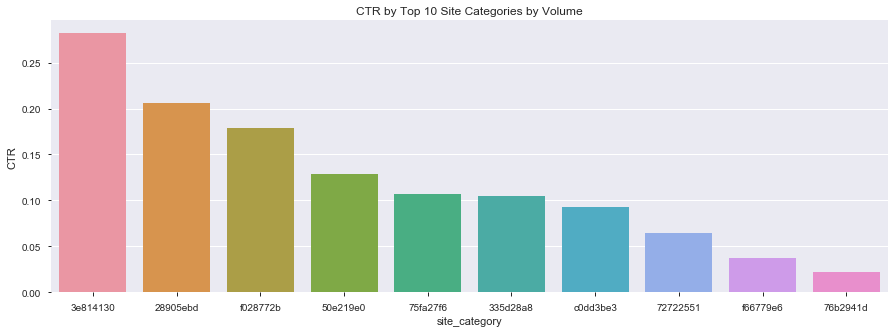

In [47]:
# Sort
sort_category = top_10_cat.sort_values(by='CTR',ascending=False)['site_category'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='site_category', data=top_10_cat, order=sort_category)
plt.title('CTR by Top 10 Site Categories by Volume')
plt.show()

### App ID

In [48]:
train.app_id.value_counts(normalize=True).head(10)

ecad2386    0.638770
92f5800b    0.038612
e2fcccd2    0.027904
9c13b419    0.018808
febd1138    0.018688
7358e05e    0.015176
a5184c22    0.012412
d36838b1    0.011052
685d1c4c    0.009910
54c5d545    0.009732
Name: app_id, dtype: float64

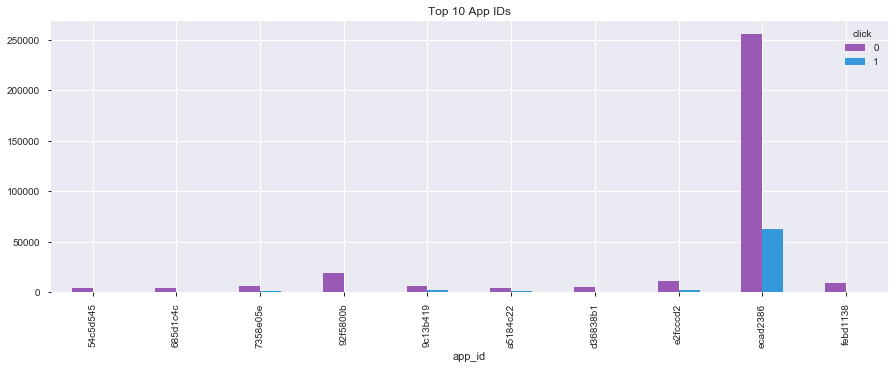

In [49]:
# Top 10
top_10_appid = train[(train.app_id.isin((train.app_id.value_counts()/len(train))[0:10].index))]
top_10_appid_click = top_10_appid[top_10_appid['click']==1]
top_10_appid.groupby(['app_id', 'click']).size().unstack().plot(kind='bar',
                                                                figsize=(15,5),
                                                                title='Top 10 App IDs')
plt.show()

In [50]:
top_10_appid = top_10_appid.groupby(['app_id', 'click']).size().unstack().reset_index()
top_10_appid = top_10_appid.rename(columns={0: 'Impressions', 1: 'Clicks'})
top_10_appid['CTR'] = top_10_appid['Clicks'] / (top_10_appid['Clicks'] + top_10_appid['Impressions'])
top_10_appid

click,app_id,Impressions,Clicks,CTR
0,54c5d545,4197,669,0.137485
1,685d1c4c,4603,352,0.071039
2,7358e05e,6224,1364,0.179758
3,92f5800b,18918,388,0.020097
4,9c13b419,6525,2879,0.306146
5,a5184c22,4679,1527,0.246052
6,d36838b1,5130,396,0.071661
7,e2fcccd2,11243,2709,0.194166
8,ecad2386,256180,63205,0.197896
9,febd1138,8910,434,0.046447


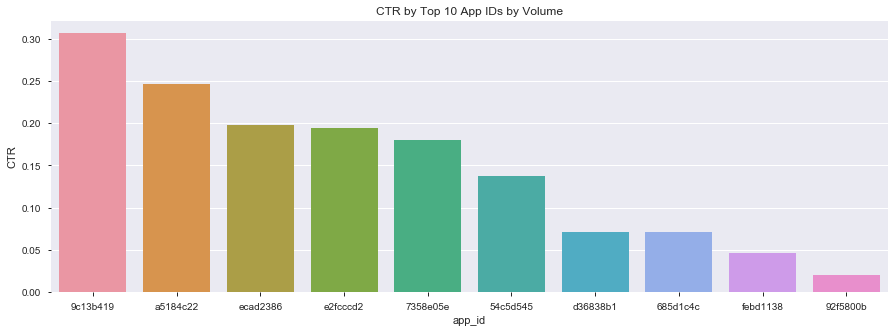

In [51]:
# Sort
sort_appid = top_10_appid.sort_values(by='CTR',ascending=False)['app_id'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='app_id', data=top_10_appid, order=sort_appid)
plt.title('CTR by Top 10 App IDs by Volume')
plt.show()

### App Category

In [52]:
print('Impressions by App Category')
print('-'*40)
print((train.app_category.value_counts()/len(train)))

Impressions by App Category
----------------------------------------
07d7df22    0.646960
0f2161f8    0.236730
cef3e649    0.042894
8ded1f7a    0.036084
f95efa07    0.028224
d1327cf5    0.003168
09481d60    0.001428
dc97ec06    0.001352
75d80bbe    0.001018
fc6fa53d    0.000590
4ce2e9fc    0.000498
879c24eb    0.000304
a3c42688    0.000250
4681bb9d    0.000158
0f9a328c    0.000134
2281a340    0.000072
a86a3e89    0.000050
8df2e842    0.000042
a7fd01ec    0.000012
2fc4f2aa    0.000008
0bfbc358    0.000006
79f0b860    0.000006
18b1e0be    0.000004
7113d72a    0.000004
0d82db25    0.000002
4b7ade46    0.000002
Name: app_category, dtype: float64


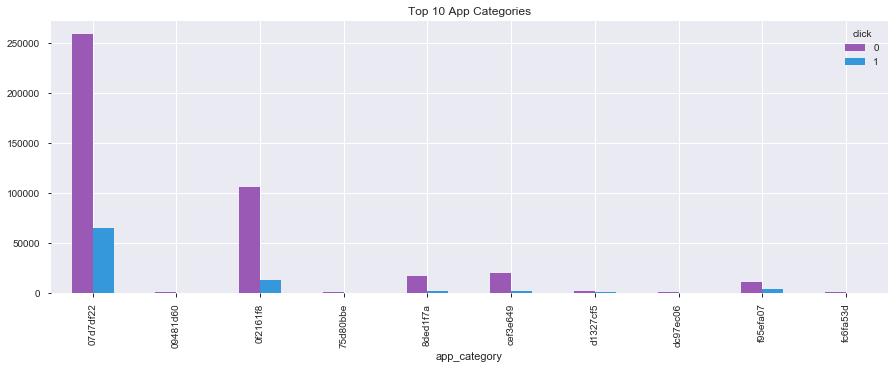

--------------------------------------------------
click app_category  Impressions  Clicks       CTR
0         07d7df22       323480   64239  0.165684
1         09481d60          714     107  0.130329
2         0f2161f8       118365   12925  0.098446
3         75d80bbe          509      45  0.081227
4         8ded1f7a        18042    1531  0.078220
5         cef3e649        21447    1909  0.081735
6         d1327cf5         1584     182  0.103058
7         dc97ec06          676     105  0.134443
8         f95efa07        14112    3565  0.201674
9         fc6fa53d          295      15  0.048387
--------------------------------------------------


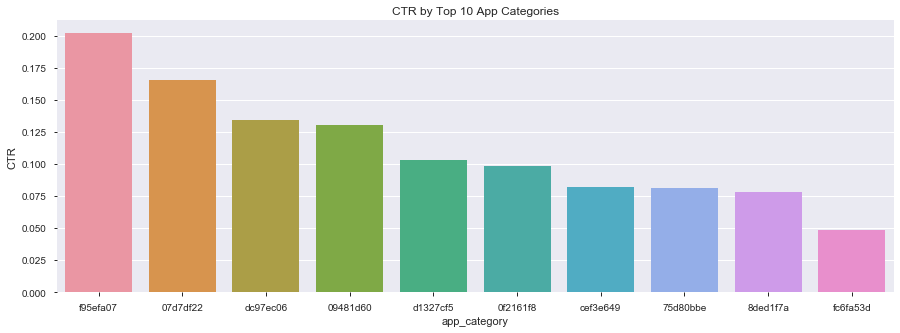

In [53]:
# Top 10
top_10_app_cat = train[(train.app_category.isin((train.app_category.value_counts()/len(train))[0:10].index))]
top_10_app_cat_click = top_10_app_cat[top_10_app_cat['click']==1]
top_10_app_cat.groupby(['app_category', 'click']).size().unstack().plot(kind='bar',
                                                                        figsize=(15,5),
                                                                        title='Top 10 App Categories')
plt.show()

# CTR
top_10_app_cat = top_10_app_cat.groupby(['app_category', 'click']).size().unstack().reset_index()
top_10_app_cat = top_10_app_cat.rename(columns={0: 'Impressions', 1: 'Clicks'})
top_10_app_cat['Impressions'] = (top_10_app_cat['Clicks'] + top_10_app_cat['Impressions'])
top_10_app_cat['CTR'] = top_10_app_cat['Clicks'] / (top_10_app_cat['Clicks'] + top_10_app_cat['Impressions'])

print('-'*50)
print(top_10_app_cat)
print('-'*50)

# Sort and plot CTR
sort_appcat = top_10_app_cat.sort_values(by='CTR',ascending=False)['app_category'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='app_category', data=top_10_app_cat, order=sort_appcat)
plt.title('CTR by Top 10 App Categories')
plt.show()

### Device Features

In [54]:
print('There are {} unique device IDs in the data set.'.format(train.device_id.nunique()))
print('There are {} unique device IPs in the data set.'.format(train.device_ip.nunique()))
print('There are {} unique device types in the data set.'.format(train.device_type.nunique()))
print('There are {} unique device models in the data set.'.format(train.device_model.nunique()))
print('There are {} unique device connection types in the data set.'.format(train.device_conn_type.nunique()))

There are 79227 unique device IDs in the data set.
There are 314269 unique device IPs in the data set.
There are 5 unique device types in the data set.
There are 4581 unique device models in the data set.
There are 4 unique device connection types in the data set.


### Device ID

In [55]:
print('The top 10 devices that have the most impressions.')
print('-'*50)
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions.
--------------------------------------------------
a99f214a    0.825026
c357dbff    0.000526
0f7c61dc    0.000496
936e92fb    0.000372
afeffc18    0.000256
28dc8687    0.000106
3cdb4052    0.000102
987552d1    0.000102
b09da1c4    0.000098
d857ffbb    0.000092
Name: device_id, dtype: float64


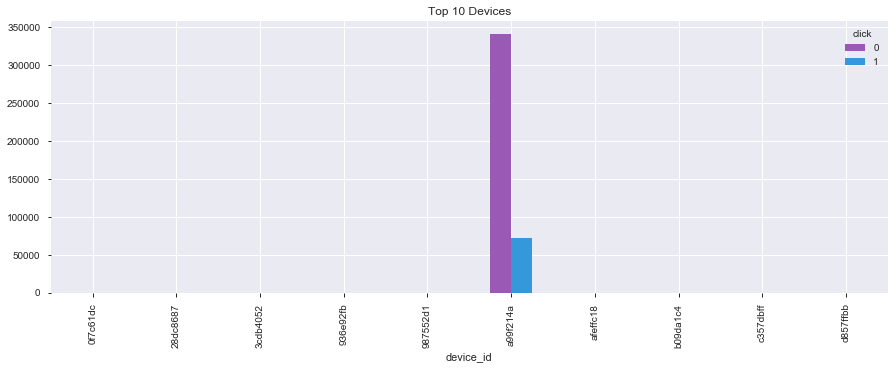

In [56]:
# Top 10
top_10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top_10_device_click = top_10_device[top_10_device['click']==1]
top_10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar',
                                                                    figsize=(15,5),
                                                                    title='Top 10 Devices')
plt.show()

In [57]:
top_10_device = top_10_device.groupby(['device_id', 'click']).size().unstack().reset_index()
top_10_device = top_10_device.rename(columns={0: 'Impressions', 1: 'Clicks'})
top_10_device['Impressions'] = (top_10_device['Clicks'] + top_10_device['Impressions'])
top_10_device['CTR'] = top_10_device['Clicks'] / (top_10_device['Clicks'] + top_10_device['Impressions'])
top_10_device

click,device_id,Impressions,Clicks,CTR
0,0f7c61dc,248.0,184.0,0.425926
1,28dc8687,NaN,NaN,NaN
2,3cdb4052,51.0,39.0,0.433333
3,936e92fb,186.0,7.0,0.036269
4,987552d1,NaN,NaN,NaN
5,a99f214a,412513.0,71600.0,0.147899
6,afeffc18,128.0,29.0,0.184713
7,b09da1c4,49.0,8.0,0.140351
8,c357dbff,263.0,173.0,0.396789
9,d857ffbb,46.0,12.0,0.206897


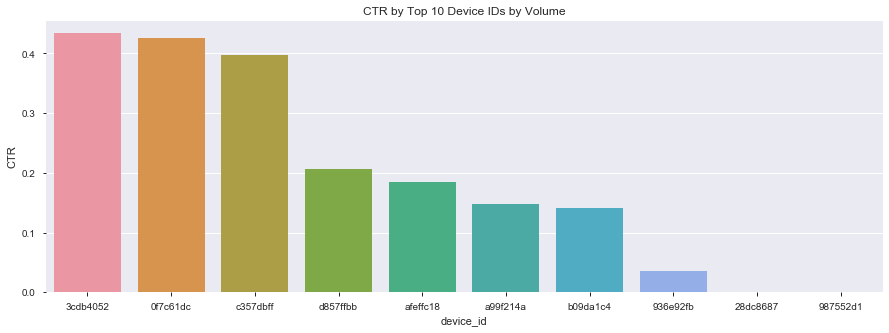

In [58]:
# Sort
sort_deviceid = top_10_device.sort_values(by='CTR',ascending=False)['device_id'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='device_id', data=top_10_device, order=sort_deviceid)
plt.title('CTR by Top 10 Device IDs by Volume')
plt.show()

In [59]:
train[train.device_id=='28dc8687'].device_id.value_counts()

28dc8687    53
Name: device_id, dtype: int64

### Device Type

In [60]:
print('Impressions by Device Types')
print('-'*40)
print((train.device_type.value_counts()/len(train)))

Impressions by Device Types
----------------------------------------
1    0.922768
0    0.054488
4    0.019410
5    0.003332
2    0.000002
Name: device_type, dtype: float64


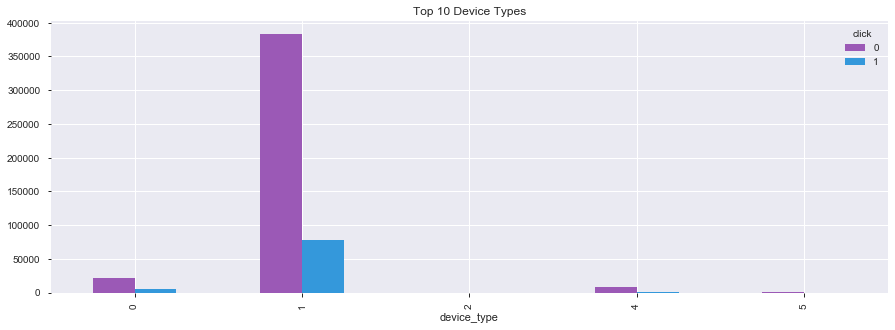

--------------------------------------------------
click  device_type  Impressions   Clicks       CTR
0                0      27244.0   5890.0  0.177763
1                1     461384.0  77739.0  0.144195
2                2          NaN      NaN       NaN
3                4       9705.0    951.0  0.089245
4                5       1666.0    139.0  0.077008
--------------------------------------------------


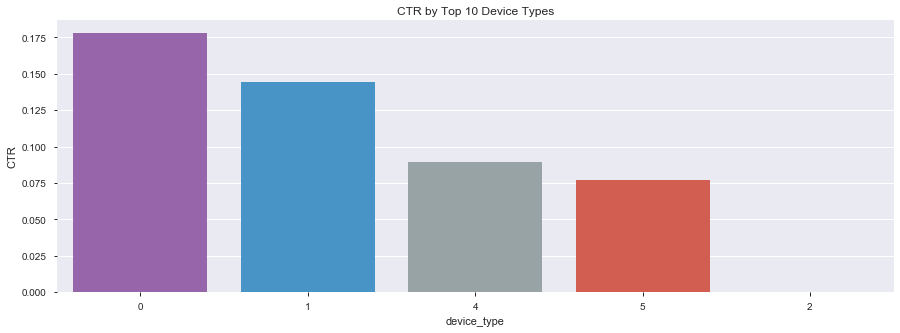

In [61]:
# Top 10
top_10_dev_type = train[(train.device_type.isin((train.device_type.value_counts()/len(train))[0:10].index))]
top_10_dev_type_click = top_10_dev_type[top_10_dev_type['click']==1]
top_10_dev_type.groupby(['device_type', 'click']).size().unstack().plot(kind='bar',
                                                                        figsize=(15,5),
                                                                        title='Top 10 Device Types')
plt.show()

# CTR
top_10_dev_type = top_10_dev_type.groupby(['device_type', 'click']).size().unstack().reset_index()
top_10_dev_type = top_10_dev_type.rename(columns={0: 'Impressions', 1: 'Clicks'})
top_10_dev_type['Impressions'] = (top_10_dev_type['Clicks'] + top_10_dev_type['Impressions'])
top_10_dev_type['CTR'] = top_10_dev_type['Clicks'] / (top_10_dev_type['Clicks'] + top_10_dev_type['Impressions'])

print('-'*50)
print(top_10_dev_type)
print('-'*50)

# Sort and plot CTR
sort_devicetype = top_10_dev_type.sort_values(by='CTR',ascending=False)['device_type'].tolist()

# Set plot features
plt.figure(figsize=(15,5))
sns.barplot(y='CTR', x='device_type', data=top_10_dev_type, order=sort_devicetype)
plt.title('CTR by Top 10 Device Types')
plt.show()

### C14-C21

In [62]:
print('There are {} unique C14 values in the dataset.'.format(train.C14.nunique()))
print('There are {} unique C15 values in the dataset.'.format(train.C15.nunique()))
print('There are {} unique C16 values in the dataset.'.format(train.C16.nunique()))
print('There are {} unique C17 values in the dataset.'.format(train.C17.nunique()))
print('There are {} unique C18 values in the dataset.'.format(train.C18.nunique()))
print('There are {} unique C19 values in the dataset.'.format(train.C19.nunique()))
print('There are {} unique C20 values in the dataset.'.format(train.C20.nunique()))

There are 2119 unique C14 values in the dataset.
There are 8 unique C15 values in the dataset.
There are 9 unique C16 values in the dataset.
There are 416 unique C17 values in the dataset.
There are 4 unique C18 values in the dataset.
There are 66 unique C19 values in the dataset.
There are 162 unique C20 values in the dataset.


### Correlation

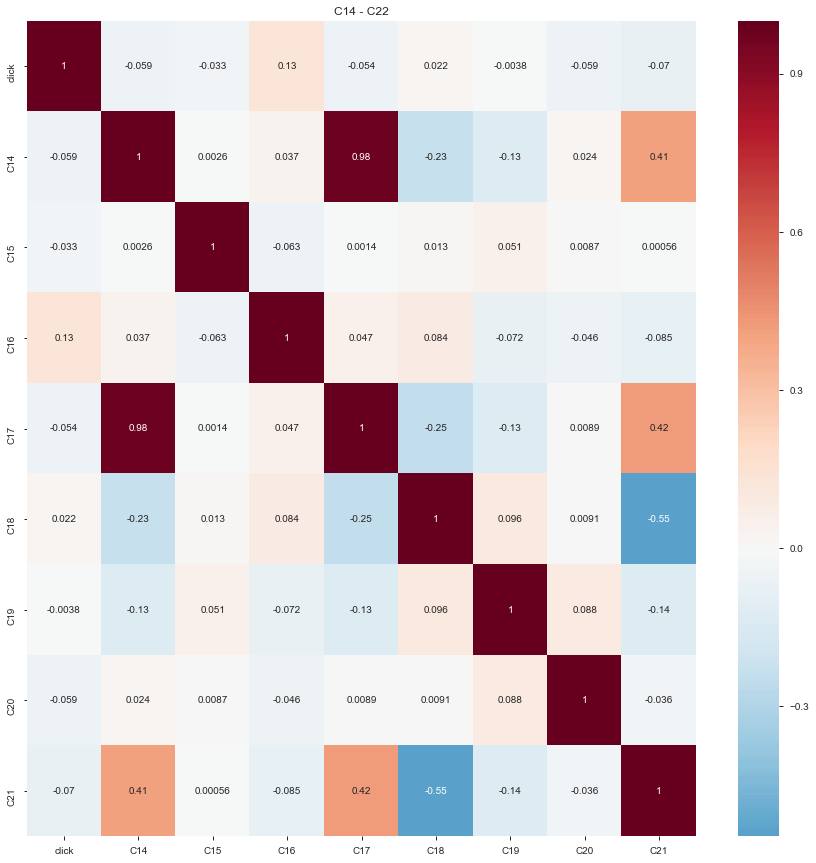

In [63]:
C_list = ['C' + str(x) for x in range(14,22)]
cols = ['click'] + C_list

# Plot
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(),
            cmap='RdBu_r',
            annot=True,
            center=0.0
           )

# Plot features
plt.title('C14 - C22')
plt.show()

C17 has almost a near perfect correlation with C14. Most likely we can do additional tests to remove one of them to reduce multicollinearity.

### C17 - Device Type

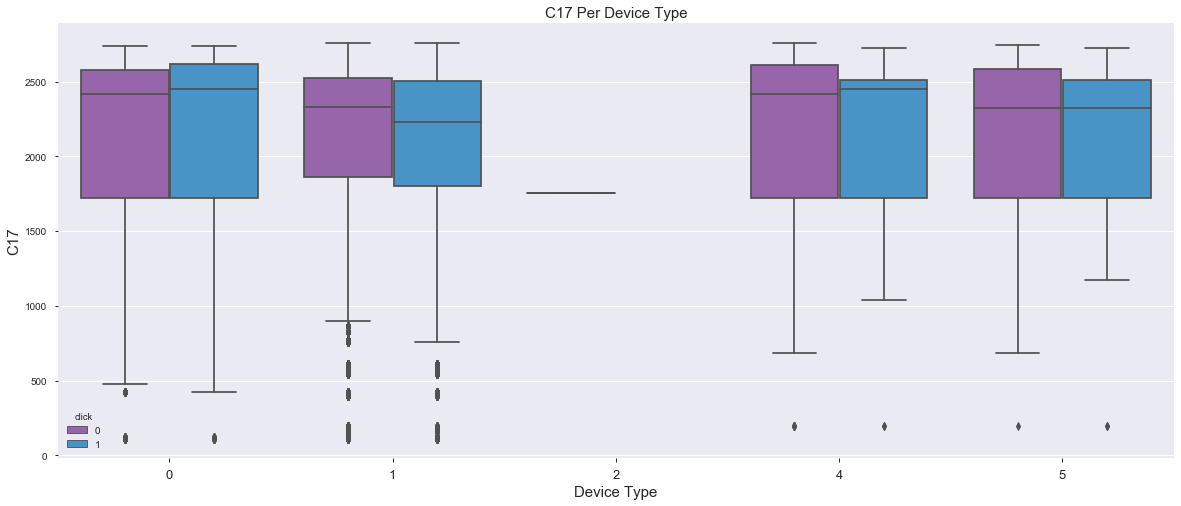

In [64]:
# Set figure size
plt.figure(figsize=(20, 8))

# Plot
sns.boxplot(x='device_type',
            y='C17',
            hue='click',
            data=train)

# Set plot features
plt.title('C17 Per Device Type', fontsize=15)
plt.xlabel('Device Type', fontsize=15)
plt.ylabel('C17', fontsize=15)
plt.xticks(fontsize=13)
plt.show()

C17 looks evenly distributed across device type.

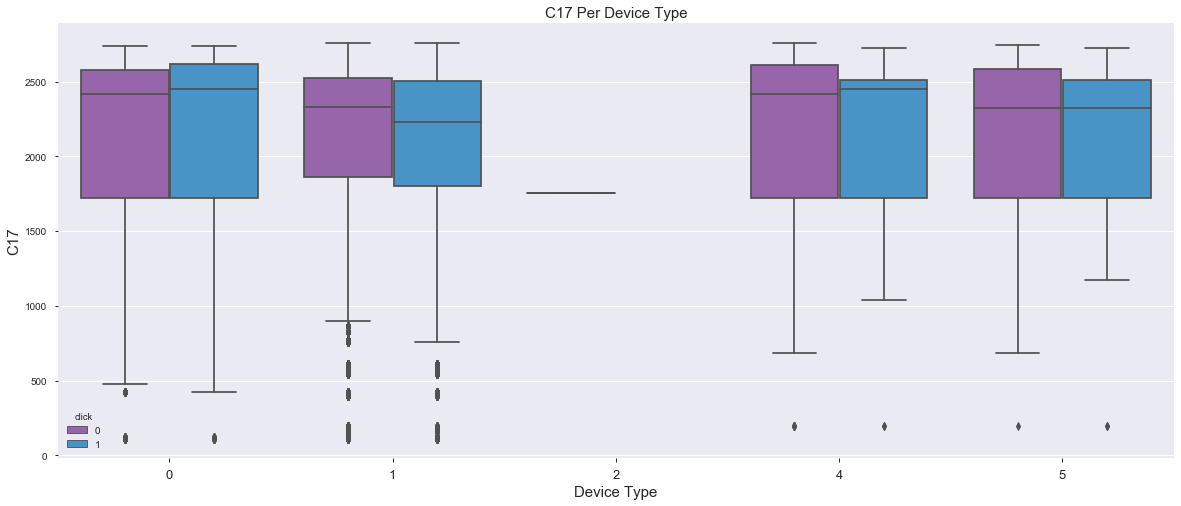

In [65]:
# Set figure size
plt.figure(figsize=(20, 8))

# Plot
sns.boxplot(x='device_type',
            y='C17',
            hue='click',
            data=train)

# Set plot features
plt.title('C17 Per Device Type', fontsize=15)
plt.xlabel('Device Type', fontsize=15)
plt.ylabel('C17', fontsize=15)
plt.xticks(fontsize=13)
plt.show()

### C14 - Device Type

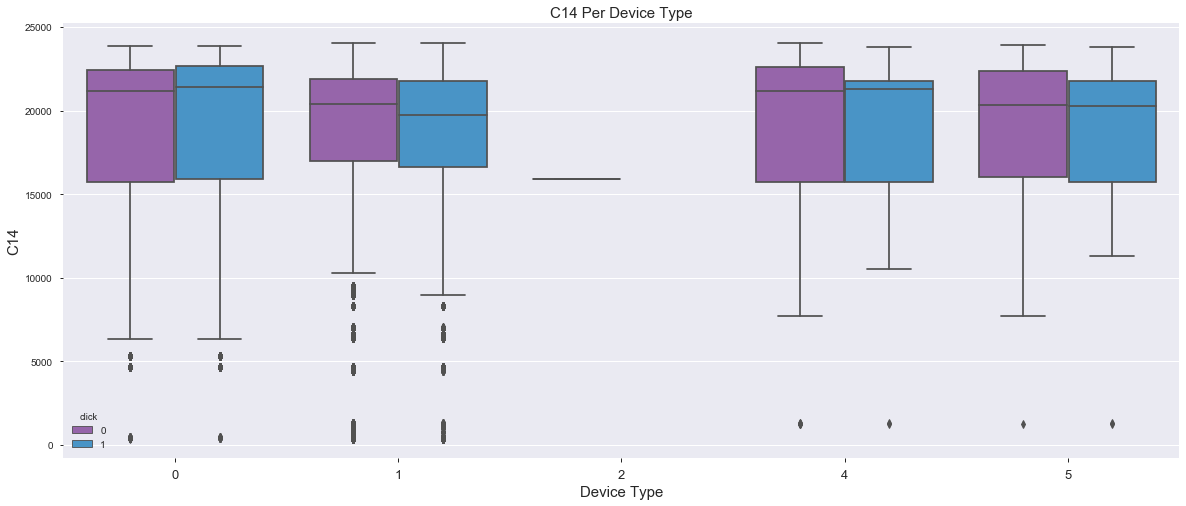

In [66]:
# Set figure size
plt.figure(figsize=(20, 8))

# Plot
sns.boxplot(x='device_type',
            y='C14',
            hue='click',
            data=train)

# Set plot features
plt.title('C14 Per Device Type', fontsize=15)
plt.xlabel('Device Type', fontsize=15)
plt.ylabel('C14', fontsize=15)
plt.xticks(fontsize=13)
plt.show()

### NAN Search
Search all of the columns to determine which columns are related by the number of NANs. For example, if there is 500 of the same NA rows in 2 columns, matching at various rows then most likely they are related based on this assumption. There are also be groups of Cs with similar NAN structure.

In [67]:
# Get NANs
nans_df = train.isna()
nans_df.head()

nans_groups = {}

i_cols = ['C'+str(i) for i in range(14, 22)]

# Loop
for col in train.columns:
    c_group = nans_df[col].sum()
    try:
        nans_groups[c_group].append(col)
    except:
        nans_groups[c_group]=[col]
        
for k, v in nans_groups.items():
    print('##### NAN Count =', k)
    print(v)

##### NAN Count = 0
['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day', 'day_of_week']


### C14 - C17 Distribution

In [68]:
train[['C14', 'C17']].describe()

,C14,C17
count,500000.000000,500000.000000
mean,18840.588318,2112.421310
std,4967.234784,610.143239
min,375.000000,112.000000
25%,16920.000000,1863.000000
50%,20346.000000,2323.000000
75%,21894.000000,2526.000000
max,24043.000000,2757.000000


### C14 C17 Histogram

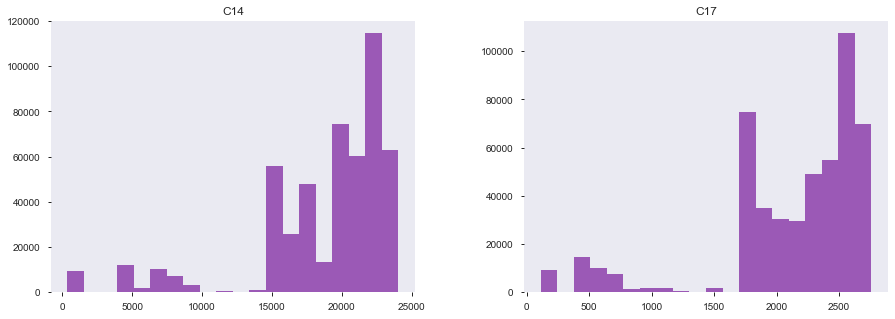

In [69]:
ax = train[['C14', 'C17']].hist(bins=20, figsize=(15,5), grid=False)
plt.show()

Distribution looks fairly similar but there is a larger spread with C14 so I am leaning towards that feature at the moment because there are more information that can be derived from it (assumption).

### Statistical Test - C14

In [70]:
# Get means for both groups
click_yes = train['C14'].mean()
click_no = train[train['click']==0]['C14'].mean()

print('The mean for the click population is: {}.'.format(str(click_no)))
print('The mean for the users that did not click is: {}.'.format(str(click_yes)))

The mean for the click population is: 18971.86847941514.
The mean for the users that did not click is: 18840.588318.


In [71]:
# Conduct t-test at 95% confidence level
stats.ttest_1samp(a=train[train.click==0]['C14'],
                  popmean=click_yes
                 )

Ttest_1sampResult(statistic=17.228591057897248, pvalue=1.70934327255773e-66)

### Statistical Test - C17

In [72]:
# Get means for both groups
click_yes = train['C17'].mean()
click_no = train[train['click']==0]['C17'].mean()

print('The mean for the click population is: {}.'.format(str(click_no)))
print('The mean for the users that did not click is: {}.'.format(str(click_yes)))

# Conduct t-test at 95% confidence level
stats.ttest_1samp(a=train[train.click==0]['C17'],
                  popmean=click_yes
                 )

The mean for the click population is: 2127.3320474570232.
The mean for the users that did not click is: 2112.42131.


Ttest_1sampResult(statistic=15.903302897578495, pvalue=6.24880985612409e-57)

After a 1 sample independent t-test of both features, the feature with the lower p-value will be chosen. The test statistical is 17.69 vs. 16.29 and p-value is 5e-70 vs. 1e-59. The test statistic tells us how much the sample mean deviates from the null hypothesis (no difference). If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence to our confidence level and degree of freedom, we reject the null hypothesis.

Since the p-value is so low on both and C14 is lower, it looks like there are some significant difference between clicks and C14/C17 features.

With this additional confirmation after looking at the distribution, correlation, and statistical testing, C14 will be used in the model instead of C17 to avoid any multicollinearity issues.

In [73]:
# Drop
train = train.drop(['C17'], axis=1)

In [74]:
for col in train:
    print(col, ':', train[col].nunique())

id : 499967
click : 2
hour : 240
C1 : 7
banner_pos : 7
site_id : 2278
site_domain : 2303
site_category : 21
app_id : 2467
app_domain : 167
app_category : 26
device_id : 79227
device_ip : 314269
device_model : 4581
device_type : 5
device_conn_type : 4
C14 : 2119
C15 : 8
C16 : 9
C18 : 4
C19 : 66
C20 : 162
C21 : 60
hour_of_day : 24
day_of_week : 7


In [75]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C18,C19,C20,C21,hour_of_day,day_of_week
0,1275849718,0,2014-10-21,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,0,17654,300,250,2,39,-1,33,0,Tuesday
1,586388666,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,0,4687,320,50,2,39,100148,32,0,Tuesday
2,762526870,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,0,21665,320,50,3,35,100050,117,0,Tuesday
3,-1928484824,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15704,320,50,0,35,-1,79,0,Tuesday
4,-1368186722,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,0,35,100084,79,0,Tuesday


In [76]:
train.drop(['hour'], axis=1, inplace=True)

### 1. Drop high uniques for simplicity

To make this analysis simple, we will go ahead and remove the features with high amount of distinct values to test a sample model.

In [77]:
high_uniques = ['site_id', 'site_domain', 'app_id', 'app_domain', 'device_id', 'device_ip', 'device_model']
# train.drop(high_uniques, axis=1, inplace=True)

### 2. Try converting the distinct objects into a number

This method is proposed by Susan Li and it's good to retain as much information as we can since all the uniques will be easier to model since they will all be numerical values, which also helps speed and performance as long as the final result is beneficial.

In [78]:
def convert_obj_to_int(self):
    '''Converts objects to integers
    A hash function is a function that maps a set of objects to a set of integers. 
    When using a hash function, this mapping is performed which takes a key of arbitrary 
    length as input and outputs an integer in a specific range.
    '''
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0, len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map(lambda x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self

In [79]:
train_obj = convert_obj_to_int(train)

In [80]:
train_obj.head()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C18,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,1275849718,0,1005,0,1,0,17654,300,250,2,...,-3997306678260791189,985271594061167740,-5006170455031389097,3569624624142095216,5486881615322149039,9112727393304216200,-5409865115524770807,639442322619144252,-3161250319772339712,-8516587911345908712
1,586388666,0,1005,0,1,0,4687,320,50,2,...,-3104077196248303490,-1713271975532789073,4133374375012986645,3711088384477536498,-4536136153828847741,8780151010178048173,-5409865115524770807,6377989977688269182,7570313751369918355,-8516587911345908712
2,762526870,0,1010,1,4,0,21665,320,50,3,...,-3104077196248303490,-1713271975532789073,4133374375012986645,-7909322312606508772,5486881615322149039,8780151010178048173,-6910601243676970909,8453180855881554275,559612316064008307,-8516587911345908712
3,-1928484824,0,1005,0,1,0,15704,320,50,0,...,-7613066818148367506,4089214655931957738,-1557492131701253240,3569624624142095216,5486881615322149039,9112727393304216200,-5409865115524770807,-2131247152131854894,6888237370495243028,-8516587911345908712
4,-1368186722,1,1005,0,1,0,15708,320,50,0,...,-7613066818148367506,4089214655931957738,-1557492131701253240,3569624624142095216,5486881615322149039,9112727393304216200,-5409865115524770807,5547190128436946562,-224106564721961331,-8516587911345908712


In [81]:
train_obj.dtypes

id                   int32
click                int32
C1                   int32
banner_pos           int32
device_type          int32
device_conn_type     int32
C14                  int32
C15                  int32
C16                  int32
C18                  int32
C19                  int32
C20                  int32
C21                  int32
hour_of_day          int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_ip_int        int64
device_model_int     int64
day_of_week_int      int64
dtype: object

### Preparing to model

In [82]:
# # Create dummy variables
# dummy_train = pd.get_dummies(data=train)

# # train.drop([''], axis=1, inplace=True)
# # dummy_train = pd.concat([train], axis=1)

In [83]:
ids = train_obj.id
train_obj.drop(['id'], axis=1, inplace=True)

In [84]:
print('=========== Data Summary ===========')
# Split data
y = train_obj[['click']]
X = train_obj.drop(['click'], axis=1)

print('Feature Data: ', X.shape)
print('Label Data: ', y.shape)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)

print('Training Output Shape:', y_train.shape)
print('Testing Output Shape:', y_test.shape)

=========== Data Summary ===========
Feature Data:  (500000, 22)
Label Data:  (500000, 1)
Training Data Shape: (350000, 22)
Testing Data Shape: (150000, 22)
Training Output Shape: (350000, 1)
Testing Output Shape: (150000, 1)


In [85]:
# # Scaler
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### XGB

In [95]:
# Param
eta = 0.1
max_depth = 5
subsample = 0.8
colsample_bytree = 0.8
learning_rate = 0.02
n_estimators = 5000

# XGB
clf = XGBClassifier(
    n_estimators=5000,
    learning_rate=learning_rate,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    eval_metric='logloss',
    tree_method='gpu_hist',
    objective='binary:logistic',
    booster='gbtree',
    random_state=seed
)  

# Set params
params = {
    'objective': 'binary:logistic',
    'booster' : 'gbtree',
    'eval_metric': 'logloss',
    'tree_method': 'gpu_hist', 
    'eta': eta,
    'max_depth': max_depth,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree
#     'silent': 1,
}
num_boost_round = 500
early_stopping_rounds = 200

print('XGBoost Parameters\n ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}\n Run for {} rounds.'.format(eta, max_depth, subsample, colsample_bytree, early_stopping_rounds))

XGBoost Parameters
 ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
 Run for 200 rounds.


In [96]:
# Create evaluation list
eval_list = [(X_train, y_train)]

xgb_model = clf.fit(X_train, y_train,
                    eval_set=eval_list,
                    early_stopping_rounds=early_stopping_rounds,
                    verbose=100
                   )

[0]	validation_0-logloss:0.68408
Will train until validation_0-logloss hasn't improved in 200 rounds.
[100]	validation_0-logloss:0.438469
[200]	validation_0-logloss:0.425063
[300]	validation_0-logloss:0.421186
[400]	validation_0-logloss:0.418497
[500]	validation_0-logloss:0.416367
[600]	validation_0-logloss:0.414365
[700]	validation_0-logloss:0.412781
[800]	validation_0-logloss:0.411626
[900]	validation_0-logloss:0.410637
[1000]	validation_0-logloss:0.409709
[1100]	validation_0-logloss:0.408923
[1200]	validation_0-logloss:0.408201
[1300]	validation_0-logloss:0.40752
[1400]	validation_0-logloss:0.406918
[1500]	validation_0-logloss:0.406294
[1600]	validation_0-logloss:0.405731
[1700]	validation_0-logloss:0.405233
[1800]	validation_0-logloss:0.404744
[1900]	validation_0-logloss:0.404283
[2000]	validation_0-logloss:0.40389
[2100]	validation_0-logloss:0.40349
[2200]	validation_0-logloss:0.403126
[2300]	validation_0-logloss:0.402778
[2400]	validation_0-logloss:0.402444
[2500]	validation_0-lo